In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Linear Regression

In [2]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [3]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [4]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [5]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [6]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

# Linear Regression

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**



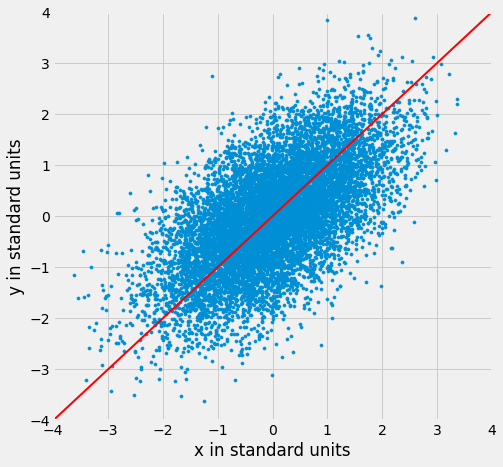

In [7]:
trial_line()

**Question:** Should we use this red line as our prediction line?

**Question:** Is this line the center for the y-values for each x-value?

To answer this lets look at x-2. What is the cetner of y-values there and what would our prediction for y be?
<br> The next line in python will show this

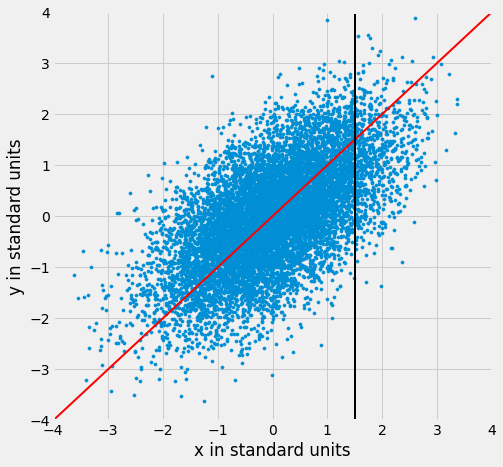

In [8]:
trial_with_vertical()

**Question**: How should we change our line?
    <details>
<summary>Solution</summary>
  Let's flatten the line. The next line of code will do this
</details>

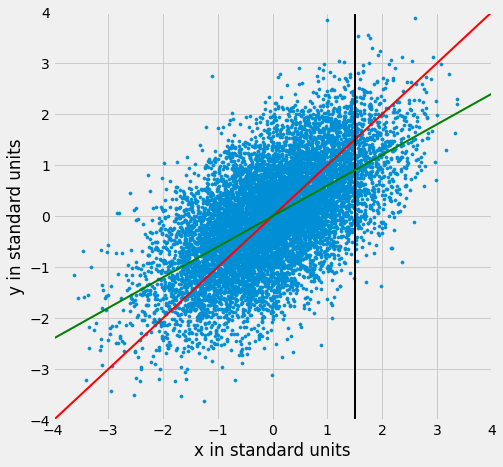

In [9]:
both_with_vertical()

**Question:** What is the slope of the new line?

<details>
<summary>Solution</summary>
  Something between 0 and 1. 
    
</details>

**Question**: What exactly is the slope of this line?
<details>
<summary>Solution</summary>
  It is the correlation between these two variables? 
    
  Looking at the graph, we can see that for *n*-standard units of x, we should pick less than *n*-standard units of y 
    
  Pearson's and Galton's observation is that the slope of the prediction line is equal to the correlation
    
</details>

### Examples

Let's try different *r* values and see what happens in the figure

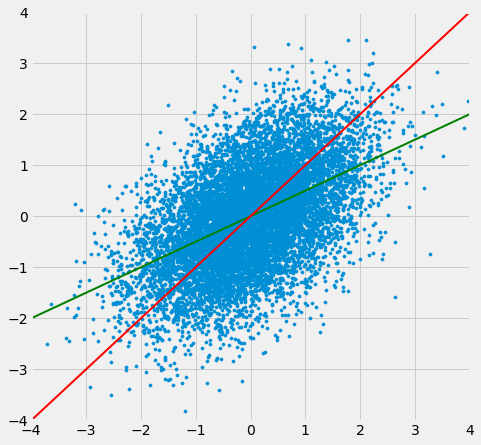

In [10]:
r = 0.5
regression_line(r)

(back to slides)

# Equation of Regression Line

In [11]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [12]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [13]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

**Question:** For a given midParent height of 68.3 inches, what will the predicted children's height be?


<details>
<summary>Solution</summary>
  galton_slope * 68.3 + galton_intercept
</details>



In [15]:
# answer in python here
y = galton_slope * 68.3 + galton_intercept
y

66.16798981260516

**Question**: Implement the function fitted_values below:
        
<details>
<summary>Solution</summary>
      a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b
</details>


In [22]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [23]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

Now lets use this function to make predictions and plot the regression prediction in a scatter plot

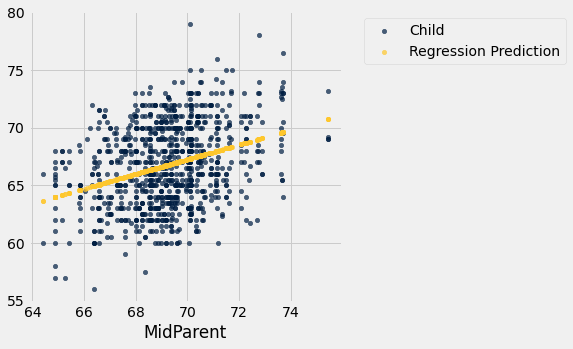

In [24]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')
heights = heights.with_column(
    'Regression Prediction', regression_predictions
)
heights.scatter('MidParent')

(back to slides)

# Root Mean Squared Error

In [25]:
little_women = Table().read_table('https://www.inferentialthinking.com/data/little_women.csv')
little_women

Characters,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


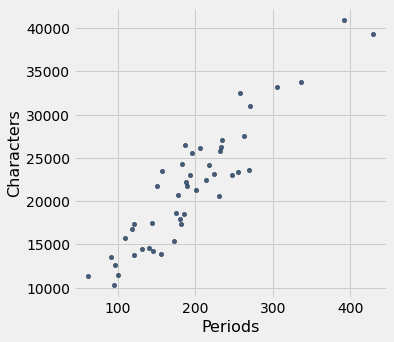

In [26]:
little_women.scatter(1,0)

**Question:** Do we think there is a linear association here?

In [27]:
correlation(little_women, 'Periods', 'Characters')

0.9229576895854816

**Question:** Let's compute the correlation

In [ ]:
correlation(little_women, 1, 0)

Now lets predict the number of characters based on the number of periods in a chapter

In [29]:
pred_characters = fitted_values(little_women, 'Periods', 'Characters') #
pred_characters 

array([21183.59679439, 21096.61895313, 24836.66612724, 21705.46384194,
       26924.13431744, 16921.68257274, 16138.88200141, 23358.04282585,
       34056.31730062, 20835.68542936, 21531.50815943, 42058.27869638,
       19965.90701678, 20400.79622307, 20487.77406433, 19704.973493  ,
       18226.35019161, 17269.59393777, 15269.10358883, 17356.57177903,
       28141.82409506, 15182.12574757, 26228.31158737, 20574.75190559,
       12659.76835108, 17791.46098532, 14225.36949373, 28315.77977757,
       25010.62180976, 23705.95419088, 20226.84054055, 24227.82123843,
       24923.6439685 , 27098.08999996, 22227.33088949, 13442.5689224 ,
       18400.30587413, 22662.22009578, 27619.95704751, 10050.43311333,
       21009.64111188, 15008.17006505, 31273.02638036, 13007.67971611,
       13094.65755737, 25097.59965102, 38840.09856983])

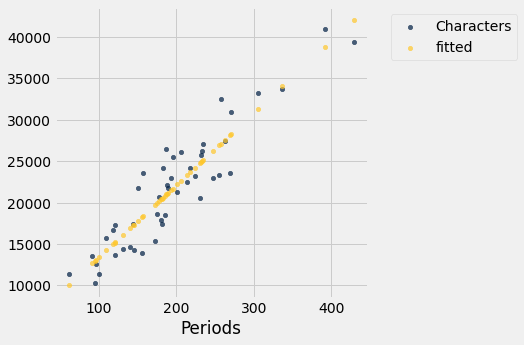

In [31]:
little_women_fitted = little_women.with_columns("fitted", pred_characters)
#little_women_fitted.hist() # What does this histogram mean? 
# Then lets uncomment the next line to look at the scatter of the predictions
little_women_fitted.scatter(1)

## Squared Error

This function will draw a line with a specified slope and intercept and will draw red lines showing the errors

In [32]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print("Slope:      ", np.round(slope), 'characters per period')
    print("Intercept:  ", np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x,y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:       50 characters per period
Intercept:   1000 characters


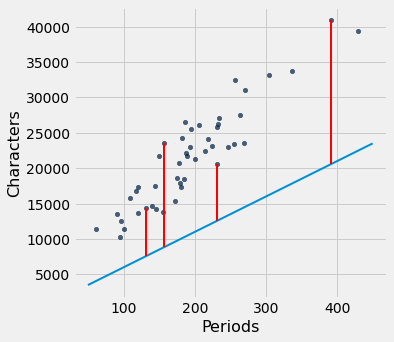

In [33]:
lw_errors(50, 1000)

Slope:       100 characters per period
Intercept:   1000 characters


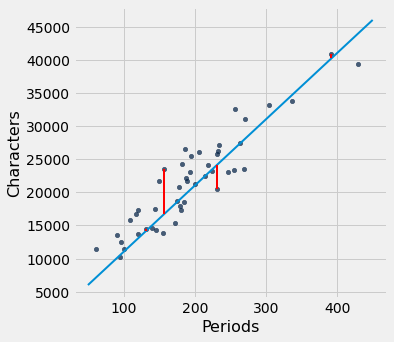

In [38]:
lw_errors(100, 1000)

Let's try it with more slopes and intercepts

In [ ]:
lw_errors(70, 1000)

Lets make a line that goes through part of the scatter diagram

Now let's compute the root mean square error for the differnt lines we just considered

In [39]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Slope:       50 characters per period
Intercept:   1000 characters
Root mean squared error: 11608.27


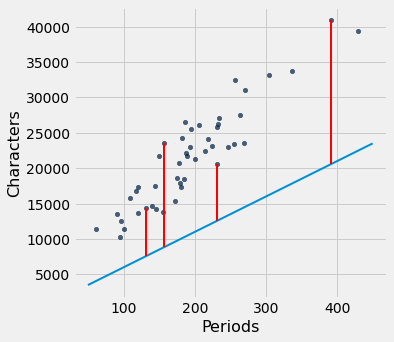

In [40]:
lw_rmse(50,1000)

Slope:       70 characters per period
Intercept:   1000 characters
Root mean squared error: 7657.15


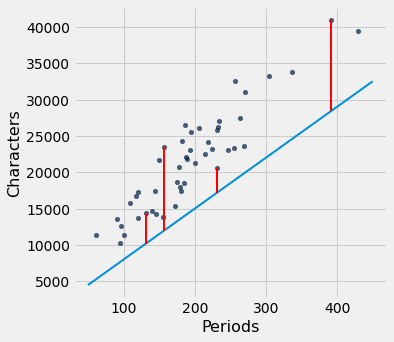

In [41]:
lw_rmse(70,1000)

Slope:       100 characters per period
Intercept:   1000 characters
Root mean squared error: 3114.33


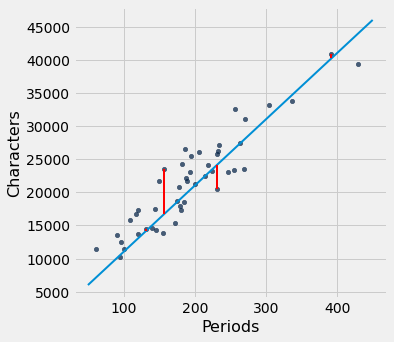

In [42]:
lw_rmse(100,1000)

Slope:       102 characters per period
Intercept:   1000 characters
Root mean squared error: 3036.57


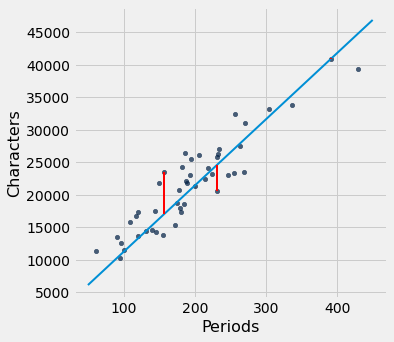

In [43]:
lw_rmse(102,1000)

Slope:       110 characters per period
Intercept:   1000 characters
Root mean squared error: 3284.41


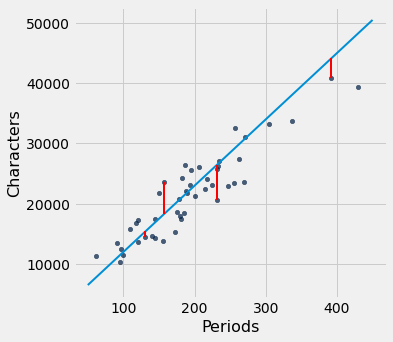

In [44]:
lw_rmse(110,1000)

Slope:       105 characters per period
Intercept:   1000 characters
Root mean squared error: 3025.85


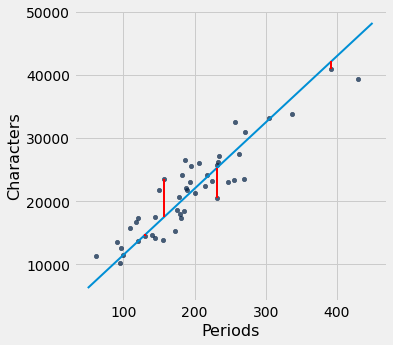

In [45]:
lw_rmse(105,1000)

Let's comput the rmse for the regression line 

<details>
<summary>Solution</summary>
  lw_rmse(slope(little_women, 1, 0), intercept(little_women, 1, 0))
</details>

In [47]:
slope(little_women, 1, 0), intercept(little_women, 1, 0)

(86.97784125829821, 4744.784796574928)

Slope:       87.0 characters per period
Intercept:   4745.0 characters
Root mean squared error: 2701.69


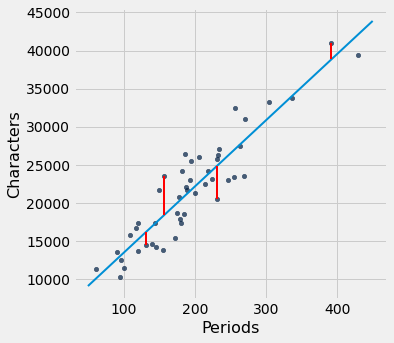

In [46]:
lw_rmse(slope(little_women, 1, 0), intercept(little_women, 1, 0))

The regression line is the line that minimzies the root mean squared error.

(back to slides)
# Least Squares

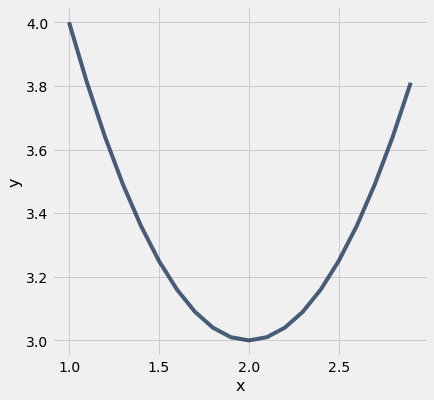

In [48]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [49]:
def f(x):
    return ((x-2)**2) + 3

What x-value gives us the smalles y-value?

In [50]:
minimize(f)

1.9999999946252267

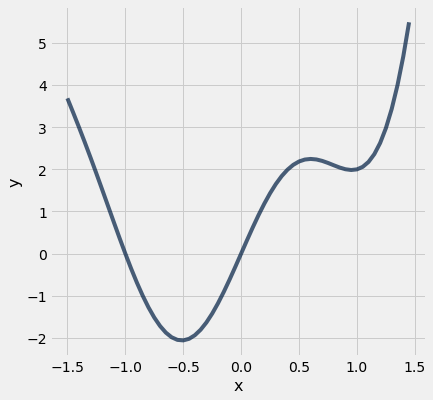

In [51]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [52]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4

What x-value gives us the smalles y-value?

In [53]:
minimize(complicated_function)

-0.5126437620940081

(back to slides)
# Minimizing MSE


In [54]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) 

In [59]:
lw_mse(1500, 20000), lw_mse(1500, 20000)

(95488325670.93617, 95488325670.93617)

In [60]:
minimize(lw_mse)

array([  86.97784117, 4744.78484535])

In [58]:
slope(little_women, "Periods", "Characters"), intercept(little_women, "Periods", "Characters")

(86.97784125829821, 4744.784796574928)

(back to slides)
# Residuals 

Let's make a new function called residuals

In [61]:
def residuals(t, x, y):
    """ Returns residual for each prediction, 
        i.e. the difference between the true y and predicted y"""
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [62]:
residuals(little_women, "Periods", "Characters")

array([  575.40320561,  1051.38104687, -4278.66612724,  3820.53615806,
       -3529.13431744, -2299.68257274, -1707.88200141,  -882.04282585,
        -289.31730062, -2327.68542936,  1492.49184057, -2695.27869638,
       -1296.90701678, -2476.79622307, -3102.77406433, -4351.973493  ,
       -4347.35019161,   162.40606223,  2068.89641117, -3104.57177903,
       -4596.82409506, -1474.12574757, -3213.31158737,  3664.24809441,
         866.23164892,  3947.53901468,  1528.63050627,  2676.22022243,
        1243.37819024,   431.04580912,   496.15945945, -1069.82123843,
         853.3560315 ,  5397.91000004,  -917.33088949, -2001.5689224 ,
        5123.69412587,  3428.77990422,  -146.95704751,  1317.56688667,
        5454.35888812,  1744.82993495,  1928.97361964, -2718.67971611,
        -536.65755737,  1996.40034898,  2094.90143017])

Let's add residuals to a table and plot the table
    <details>
<summary>Solution</summary>
  little_women_fitted.with_columns('residuals', residuals(little_women, "Periods", "Characters")).scatter('Periods')
</details>

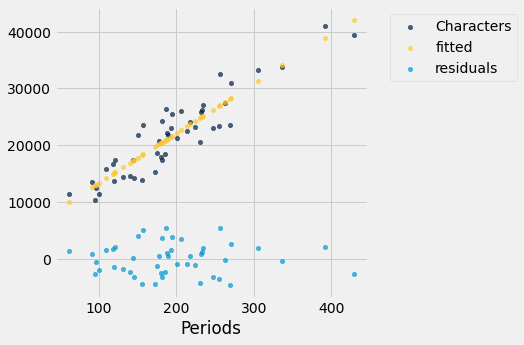

In [63]:
  little_women_fitted.with_columns('residuals', residuals(little_women, "Periods", "Characters")).scatter('Periods')

**Question:** Why are the residuals on the bottom?
        <details>
<summary>Solution</summary>
  Becuase residuals show the difference between the prediction and the true value
</details>

Let's plot the residuals and the predictions seperately

In [64]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        "Fitted", fitted_values(t, x, y),
        "Residual", residuals(t, x, y)/ 1000 # I did this division just for this example
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

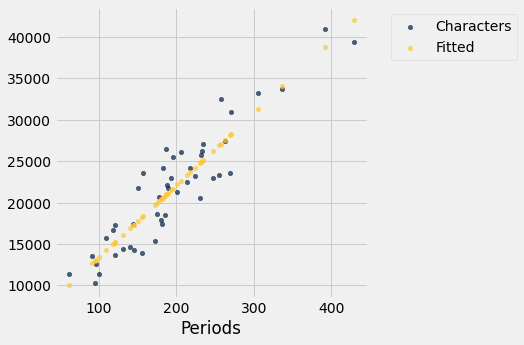

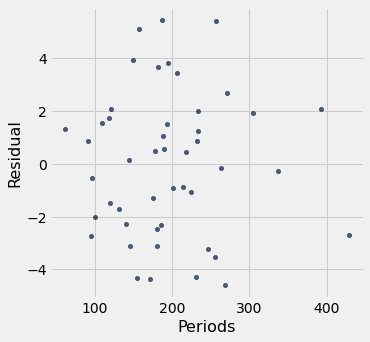

In [65]:
plot_residuals(little_women, "Periods", "Characters")

We see the residuals clustered around 0. This makes sense because the data is correlated

(back to demo)
# Nonlinear Regression

We will look at two examples


In [66]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


In [67]:
correlation(shotput, "Weight Lifted", "Shot Put Distance")

0.8929919094772174

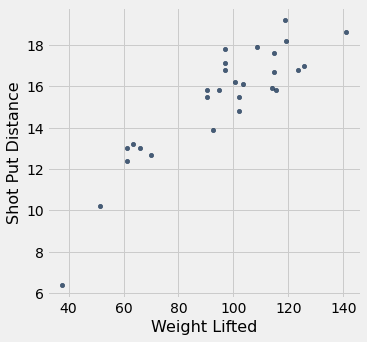

In [68]:
shotput.scatter('Weight Lifted')

**Question**: Is the association linear?

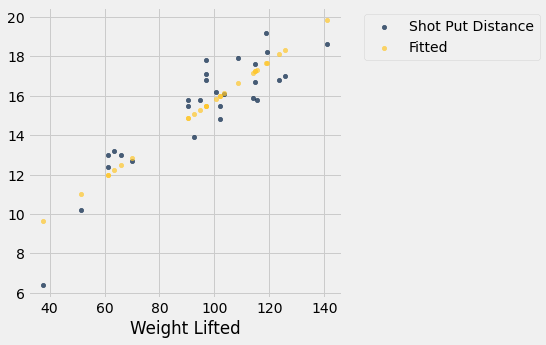

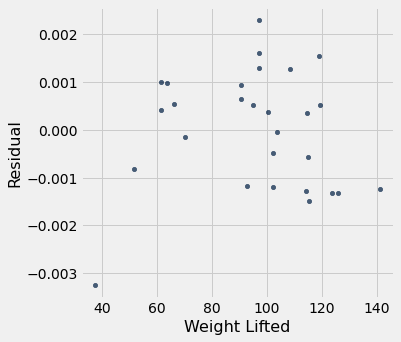

In [69]:
plot_residuals(shotput, "Weight Lifted", "Shot Put Distance")

Let's look at another example

In [70]:
height_weight = Table.read_table('us_women.csv')
height_weight

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


**Question**: Is the association linear?

In [71]:
correlation(height_weight, 'height', 'ave weight')

0.9954947677842161

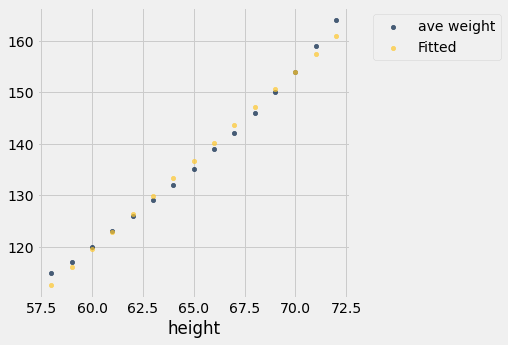

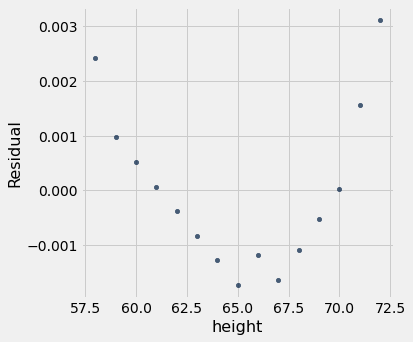

In [72]:
plot_residuals(height_weight, 'height', "ave weight")

(back to slides) 
# A Measure of cluster

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
plot_fitted(height_weight, 'height', "ave weight")

In [ ]:
weight_pred_sd = np.std(fitted_values(height_weight, 'height', 'ave weight'))
weight_observed_sd = np.std(height_weight.column('ave weight'))
print(weight_pred_sd)
print(weight_observed_sd)

In [ ]:
weight_pred_sd / weight_observed_sd

In [ ]:
correlation(height_weight, 'height', 'ave weight')

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_21_completed.ipynb", pdf=False)